In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
df=pd.read_csv("OLX_FINAL.csv")

In [3]:
df.head()

,Brand,Condition,Fuel,KMs Driven,Model,Price,Transaction Type,Year,State
0,Suzuki,Used,CNG,10000.0,Bolan,250000.0,Cash,2018.0,Haryana
1,Toyota,Used,CNG,100000.0,Sprinter,150000.0,Cash,2018.0,Karnataka
2,Daihatsu,Used,CNG,100000.0,Charade,255000.0,Cash,2018.0,Jharkhand
3,Suzuki,Used,CNG,569803.0,FX,100000.0,Cash,2018.0,Meghalaya
4,Suzuki,Used,CNG,50000.0,FX,90000.0,Cash,2018.0,Gujarat


In [4]:
print(df.columns)

Index(['Brand', 'Condition', 'Fuel', 'KMs Driven', 'Model', 'Price',
       'Transaction Type', 'Year', 'State'],
      dtype='object')


In [5]:
df.dtypes

Brand                object
Condition            object
Fuel                 object
KMs Driven          float64
Model                object
Price               float64
Transaction Type     object
Year                float64
State                object
dtype: object

In [6]:
df.describe()

,KMs Driven,Price,Year
count,2.952000e+03,2.952000e+03,2952.000000
mean,1.495867e+05,8.282760e+05,2020.038279
std,7.169024e+05,8.790988e+05,1.462125
min,1.000000e+00,5.000000e+04,2018.000000
25%,2.250000e+04,3.800000e+05,2019.000000
50%,7.300000e+04,6.600000e+05,2020.000000
75%,1.000000e+05,1.050000e+06,2021.000000
max,1.000000e+07,2.700000e+07,2022.000000


In [7]:
df.describe(include = "all")

,Brand,Condition,Fuel,KMs Driven,Model,Price,Transaction Type,Year,State
count,2953,2952,2952,2.952000e+03,2950,2.952000e+03,2952,2952.000000,2952
unique,18,2,5,NaN,173,NaN,2,NaN,33
top,Suzuki,Used,Petrol,NaN,Cultus VXR,NaN,Cash,NaN,Maharashtra
freq,1275,2452,1783,NaN,265,NaN,2839,NaN,283
mean,NaN,NaN,NaN,1.495867e+05,NaN,8.282760e+05,NaN,2020.038279,NaN
std,NaN,NaN,NaN,7.169024e+05,NaN,8.790988e+05,NaN,1.462125,NaN
min,NaN,NaN,NaN,1.000000e+00,NaN,5.000000e+04,NaN,2018.000000,NaN
25%,NaN,NaN,NaN,2.250000e+04,NaN,3.800000e+05,NaN,2019.000000,NaN
50%,NaN,NaN,NaN,7.300000e+04,NaN,6.600000e+05,NaN,2020.000000,NaN
75%,NaN,NaN,NaN,1.000000e+05,NaN,1.050000e+06,NaN,2021.000000,NaN


In [8]:
missing_data = df.isnull()
missing_data.head(5)

,Brand,Condition,Fuel,KMs Driven,Model,Price,Transaction Type,Year,State
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [9]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

Brand
False    2953
True       46
Name: Brand, dtype: int64

Condition
False    2952
True       47
Name: Condition, dtype: int64

Fuel
False    2952
True       47
Name: Fuel, dtype: int64

KMs Driven
False    2952
True       47
Name: KMs Driven, dtype: int64

Model
False    2950
True       49
Name: Model, dtype: int64

Price
False    2952
True       47
Name: Price, dtype: int64

Transaction Type
False    2952
True       47
Name: Transaction Type, dtype: int64

Year
False    2952
True       47
Name: Year, dtype: int64

State
False    2952
True       47
Name: State, dtype: int64



In [10]:
avg_KMsDriven = df["KMs Driven"].astype("float").mean(axis = 0)
print("Average of KMs Driven:", avg_KMsDriven)
df["KMs Driven"].replace(np.nan, avg_KMsDriven, inplace = True)

Average of KMs Driven: 149586.7306958672


In [11]:
avg_Year = df["Year"].astype("float").mean(axis = 0)
print("Average of Year:", avg_Year)
df["Year"].replace(np.nan, avg_Year, inplace = True)

Average of Year: 2020.0382791327913


# Visualization And Data Analysis

In [12]:
df['Fuel'].value_counts()

Petrol    1783
CNG       1018
Hybrid      93
Diesel      55
LPG          3
Name: Fuel, dtype: int64

<AxesSubplot: title={'center': 'Fuel Vs Price'}, xlabel='Fuel', ylabel='Price'>

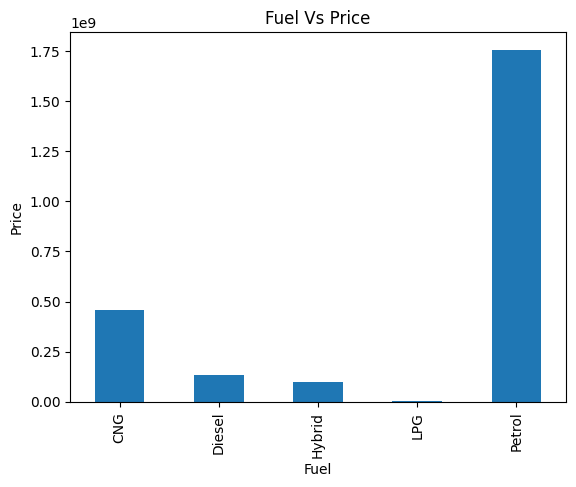

In [13]:
var = df.groupby('Fuel').Price.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Fuel')
ax1.set_ylabel('Price')
ax1.set_title("Fuel Vs Price")
var.plot(kind='bar')

In [14]:
df['Condition'].value_counts()

Used    2452
New      500
Name: Condition, dtype: int64

<AxesSubplot: title={'center': 'Condition Vs Price'}, xlabel='Condition', ylabel='Increase In price'>

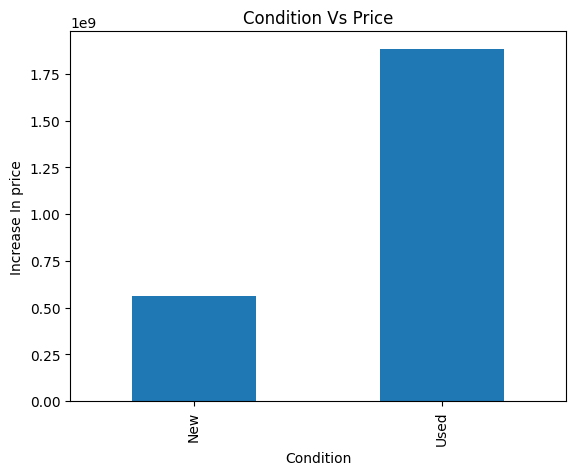

In [15]:
var = df.groupby('Condition').Price.sum() 
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Condition Of Car')
ax1.set_ylabel('Increase In price')
ax1.set_title("Condition Vs Price")
var.plot(kind='bar')



In [16]:
df['Brand'].value_counts()

Suzuki          1275
Toyota           692
Honda            436
Daihatsu         305
Nissan            68
Mitsubishi        65
KIA               23
Hyundai           19
Other Brands      18
Chevrolet         12
Mazda             10
FAW                8
Daewoo             7
Mercedes           6
BMW                4
Lexus              3
Audi               1
Brand              1
Name: Brand, dtype: int64

<AxesSubplot: title={'center': 'Brand Vs Price'}, xlabel='Brand', ylabel='Increase In price'>

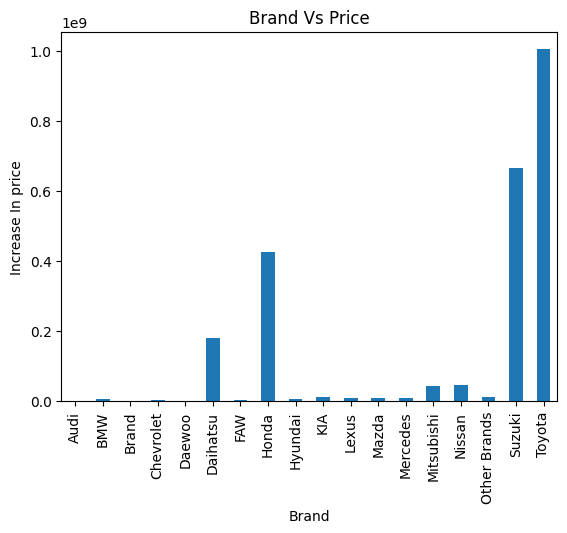

In [17]:
var = df.groupby('Brand').Price.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Brand')
ax1.set_ylabel('Increase In price')
ax1.set_title("Brand Vs Price")
var.plot(kind='bar')


In [18]:
df['Model'].value_counts()

Cultus VXR     265
Alto           259
Corolla GLI    142
Mehran VX      126
Mehran VXR     123
              ... 
350Z             1
Pickup           1
Life             1
Yaris            1
Otti             1
Name: Model, Length: 173, dtype: int64

<AxesSubplot: title={'center': 'Model Vs Price'}, xlabel='Model', ylabel='Increase In price'>

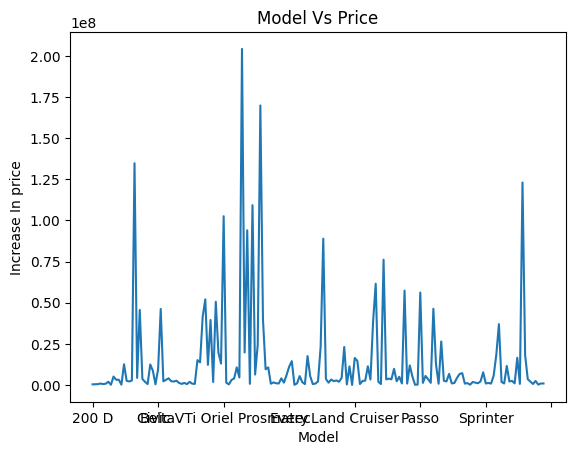

In [19]:
var = df.groupby('Model').Price.sum() 
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Model Of Car')
ax1.set_ylabel('Increase In price')
ax1.set_title("Model Vs Price")
var.plot(kind='line')

In [20]:
df['Year'].value_counts()

2022.000000    657
2021.000000    640
2019.000000    637
2018.000000    602
2020.000000    416
2020.038279     47
Name: Year, dtype: int64

<AxesSubplot: title={'center': 'Year Vs Price'}, xlabel='Year', ylabel='Increase In price'>

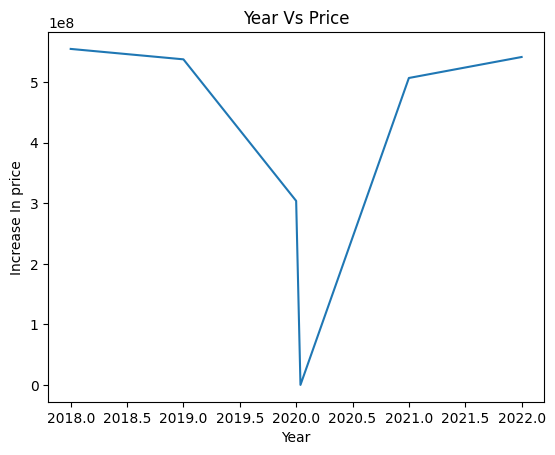

In [21]:
var = df.groupby('Year').Price.sum() 
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Condition Of Car')
ax1.set_ylabel('Increase In price')
ax1.set_title("Year Vs Price")
var.plot(kind='line')

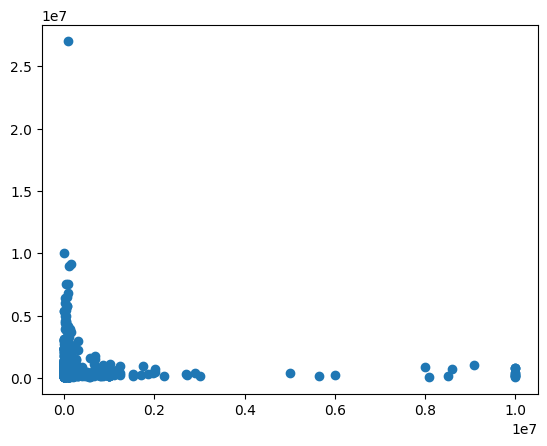

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['KMs Driven'],df['Price']) 
plt.show()

In [23]:
df['Transaction Type'].value_counts()

Cash                   2839
Installment/Leasing     113
Name: Transaction Type, dtype: int64

<AxesSubplot: title={'center': 'Transaction Type Vs Price'}, xlabel='Transaction Type', ylabel='Increase In price'>

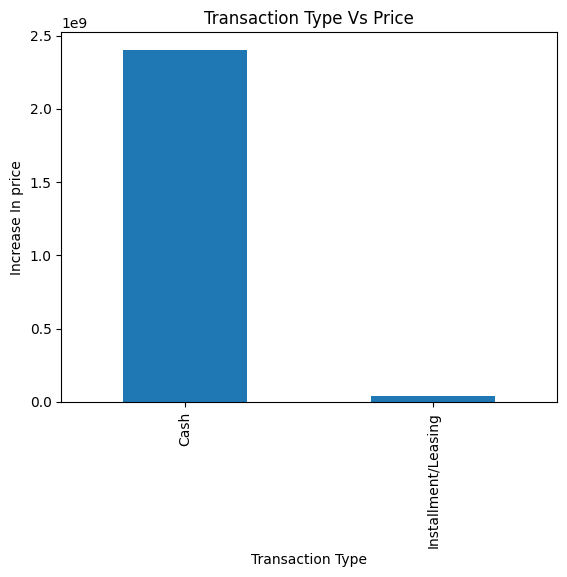

In [24]:
var = df.groupby('Transaction Type').Price.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Transaction Type')
ax1.set_ylabel('Increase In price')
ax1.set_title("Transaction Type Vs Price")
var.plot(kind='bar')

Text(0.5, 1.0, 'Brands of cars')

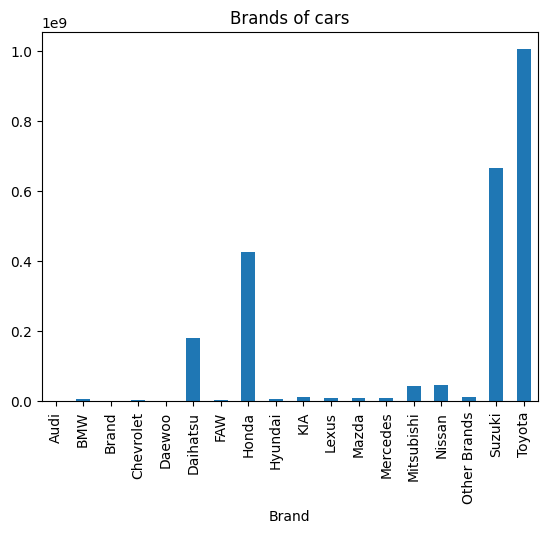

In [25]:
var = df.groupby('Brand').Price.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Brand')
var.plot(kind='bar')
ax1.set_title("Brands of cars")




Text(0.5, 1.0, 'Types of Fuels')

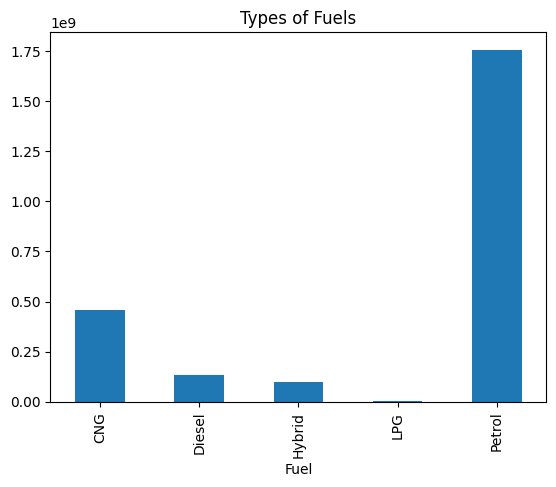

In [26]:
var = df.groupby('Fuel').Price.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Fuels')
var.plot(kind='bar')
ax1.set_title("Types of Fuels")


Text(0.5, 1.0, 'Types of Transaction')

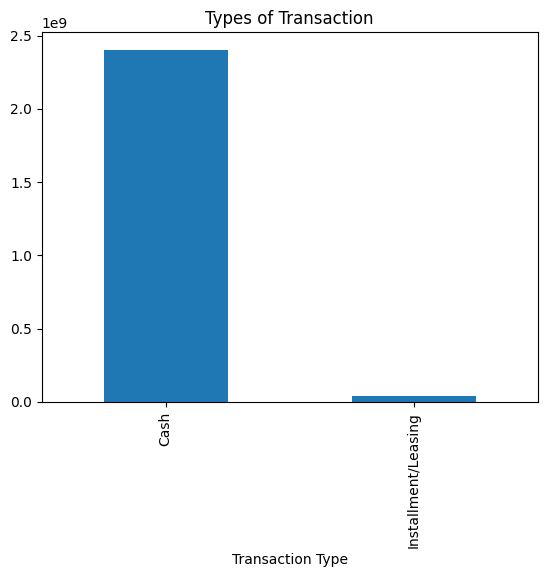

In [27]:
var = df.groupby('Transaction Type').Price.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Transactions Type')
var.plot(kind='bar')
ax1.set_title("Types of Transaction")


Text(0.5, 1.0, 'Years')

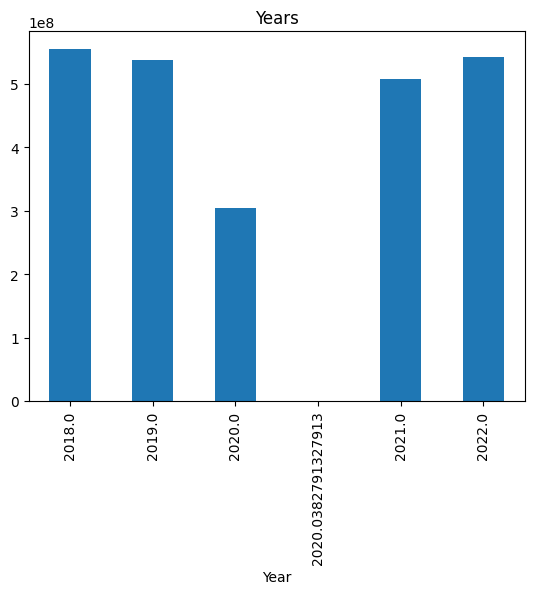

In [28]:
var = df.groupby('Year').Price.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Years')
var.plot(kind='bar')
ax1.set_title("Years")